In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import kagglehub
from kagglehub import KaggleDatasetAdapter

from os import path
from sys import exit
import math

/home/abrarshakhi/Desktop/dev/employee-attrition-predictor/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
class DatasetLoader:
    def __init__(self):
        self.kaggle_url = "thedevastator/employee-attrition-and-factors"
        
        self.file_name = "HR_Analytics.csv.csv"
        self.dir_name = "dataset"
        
        self.file_path = path.join("..", self.dir_name, self.file_name)
        self.github_url = f'https://raw.githubusercontent.com/AbrarShakhi/employee-attrition-predictor/main/{self.dir_name}/{self.file_name}'
    
    def load_from_kaggle(self):
        try:
            return kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, self.kaggle_url, self.file_name)
        except:
            return None

    def load_from_github(self):
        try:
            return pd.read_csv(self.github_url)
        except:
            return None

    def load_from_local(self):
        try:
            return pd.read_csv(self.file_path)
        except:
            return None

In [4]:
loader = DatasetLoader()
df = loader.load_from_local()
if df is None:
    df = loader.load_from_github()
if df is None:
    df = loader.load_from_kaggle()
if df is None:
    print("Unable to find data..")
    exit(1)

df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
print("total number of null values in dataset: ",
      sum(df.isnull().sum().to_numpy())
     )

total number of null values in dataset:  0


In [6]:
target_column_name = "Attrition"
df[target_column_name].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

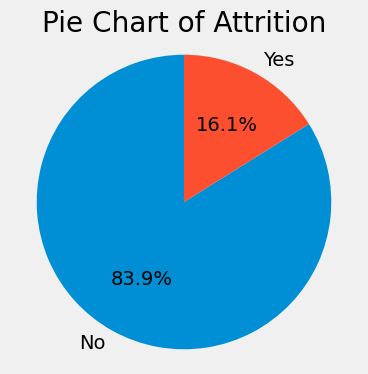

In [7]:
counts = df[target_column_name].value_counts()

labels = counts.index.tolist()
sizes = counts.values

plt.style.use('fivethirtyeight')
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f'Pie Chart of {target_column_name}')
plt.axis('equal')
plt.show()


In [8]:
nominal_columns = []
ordinal_columns = []
other_columns = []

for col in df.columns:
    if df[col].dtype == "object":
        ordinal_columns.append(col)
    elif df[col].dtype != "int64" and df[col].dtype != "float64":
        other_columns.append(col)

for col in [
        "Attrition",
        "BusinessTravel",
        "Department",
        "EducationField",
        "EnvironmentSatisfaction",
        "Gender",
        "JobInvolvement",
        "JobLevel",
        "JobRole",
        "JobSatisfaction",
        "MaritalStatus",
        "Over18",
        "OverTime",
        "PerformanceRating",
        "RelationshipSatisfaction",
        "WorkLifeBalance"
    ]:
    if col not in ordinal_columns:
        ordinal_columns.append(col)

for col in df.columns:
    if col not in ordinal_columns and col not in other_columns:
        if df[col].dtype != "object":
            nominal_columns.append(col)
        else:
            other_columns.append(col)

print("Nominal columns: ", nominal_columns)
print("Ordinal columns: ", ordinal_columns)
print("Other columns: ", other_columns)

print("Total nominal columns: ", len(nominal_columns))
print("Total ordinal columns: ", len(ordinal_columns))
print("Total other columns: ", len(other_columns))
print("Nominal + original + other columns: ", len(nominal_columns) + len(ordinal_columns) + len(other_columns))
print("Total columns: ", len(df.columns))

Nominal columns:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Ordinal columns:  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']
Other columns:  []
Total nominal columns:  19
Total ordinal columns:  16
Total other columns:  0
Nominal + original + other columns:  35
Total columns:  35


In [9]:
def print_nominal_info(col):
    print("Column name: ", col)
    print("Mean: ", df[col].mean())
    print("Median: ", df[col].median())
    print("varience: ", df[col].var())
    print("std-dev: ", df[col].std())

def print_ordinal_info(col):
    counts = df[col].value_counts()
    print(
        pd.DataFrame({
            "Frequency": counts,
            "Percentage": counts / len(df) * 100
        })
    )

In [10]:
for col in nominal_columns:
    print_nominal_info(col)
    print()

Column name:  Age
Mean:  36.923809523809524
Median:  36.0
varience:  83.45504878602223
std-dev:  9.135373489136732

Column name:  DailyRate
Mean:  802.4857142857143
Median:  802.0
varience:  162819.5937372362
std-dev:  403.50909994352816

Column name:  DistanceFromHome
Mean:  9.19251700680272
Median:  7.0
varience:  65.72125097826742
std-dev:  8.106864435666074

Column name:  Education
Mean:  2.912925170068027
Median:  3.0
varience:  1.0489138337431638
std-dev:  1.0241649445978729

Column name:  EmployeeCount
Mean:  1.0
Median:  1.0
varience:  0.0
std-dev:  0.0

Column name:  EmployeeNumber
Mean:  1024.865306122449
Median:  1020.5
varience:  362433.29974854476
std-dev:  602.0243348474751

Column name:  HourlyRate
Mean:  65.89115646258503
Median:  66.0
varience:  413.28562629953274
std-dev:  20.329427593996165

Column name:  MonthlyIncome
Mean:  6502.931292517007
Median:  4919.0
varience:  22164857.07151841
std-dev:  4707.956783097994

Column name:  MonthlyRate
Mean:  14313.103401360544

In [11]:
for col in ordinal_columns:
    print_ordinal_info(col)
    print()

           Frequency  Percentage
Attrition                       
No              1233   83.877551
Yes              237   16.122449

                   Frequency  Percentage
BusinessTravel                          
Travel_Rarely           1043   70.952381
Travel_Frequently        277   18.843537
Non-Travel               150   10.204082

                        Frequency  Percentage
Department                                   
Research & Development        961   65.374150
Sales                         446   30.340136
Human Resources                63    4.285714

                  Frequency  Percentage
EducationField                         
Life Sciences           606   41.224490
Medical                 464   31.564626
Marketing               159   10.816327
Technical Degree        132    8.979592
Other                    82    5.578231
Human Resources          27    1.836735

        Frequency  Percentage
Gender                       
Male          882        60.0
Female        588  

### Target Column (Attrition)

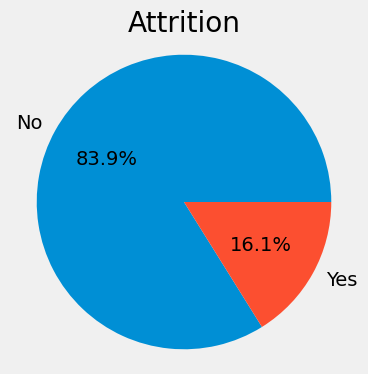

In [12]:
counts = df[target_column_name].value_counts()

plt.figure(figsize=(4, 4))

plt.pie(counts.values, labels=counts.index.to_numpy(), autopct='%1.1f%%')
plt.title(f"{target_column_name}")
plt.axis('equal')
plt.show()

### Age